Drawing radar charts in various combinations.

In [ ]:
import pandas as pd

df_indices = pd.read_csv('responses_indices.csv', sep=';', encoding='utf-8-sig')

Golden standard data.

In [ ]:
df_golden = pd.read_csv('golden_scores.csv', sep=';', encoding='utf-8-sig',na_values=['#NULL!'])

df_golden = df_golden[(df_golden['ctr'] == 'RUS') | (df_golden['ctr'] == 'USA')]

In [ ]:
nationalities = df_indices['nationality'].unique()
locals = df_indices['local'].unique()
models = df_indices['model'].unique()

Model/nationality.

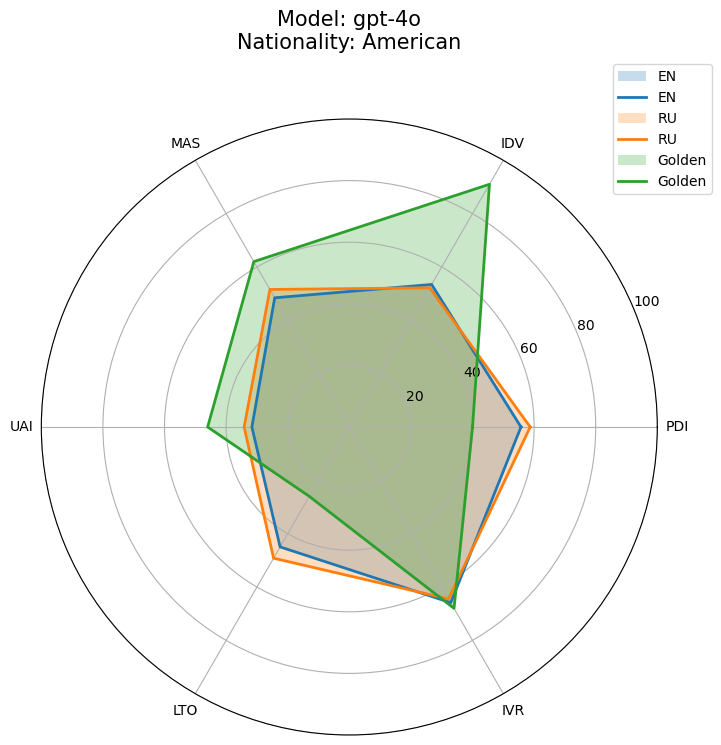

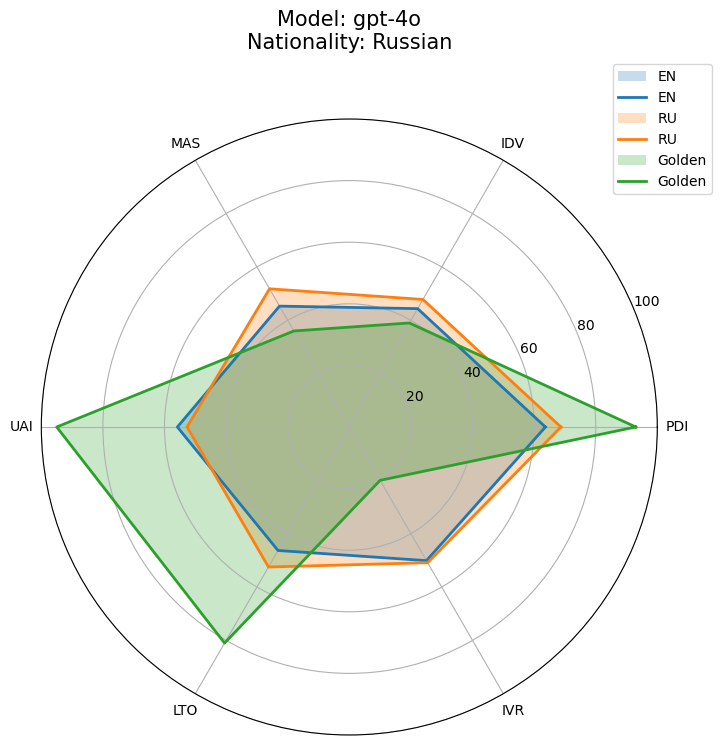

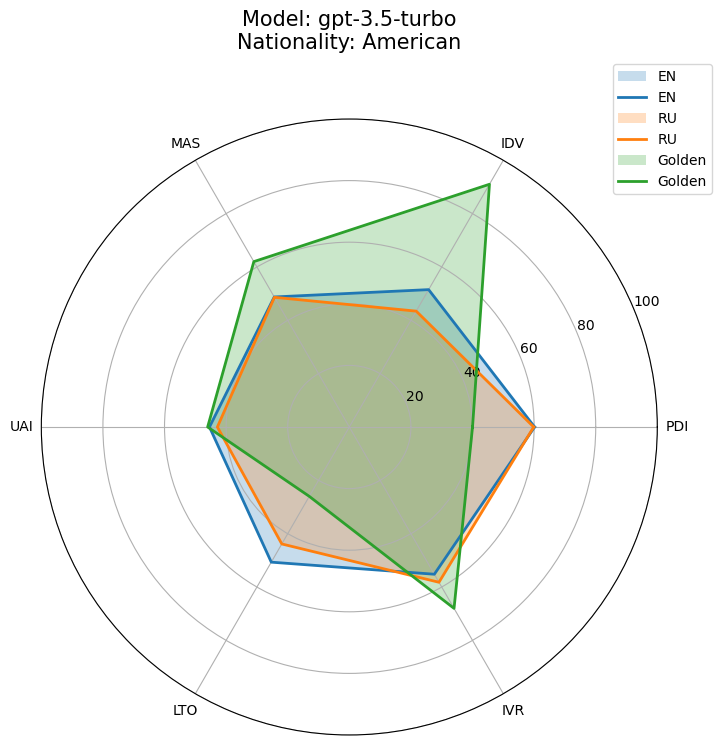

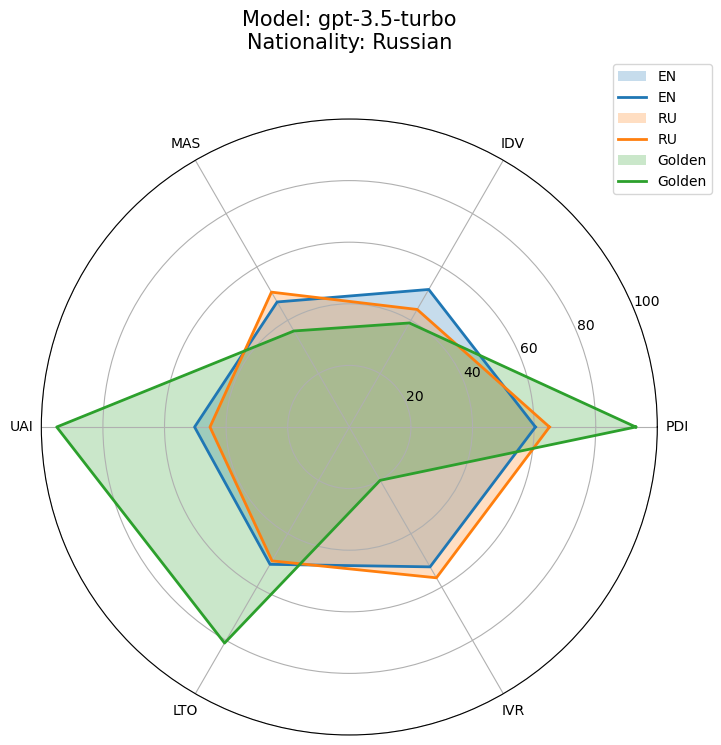

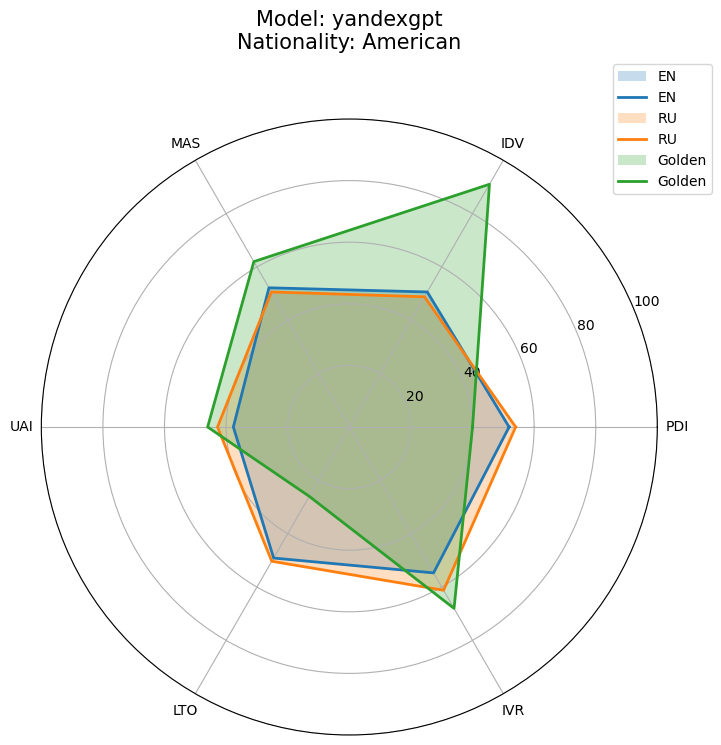

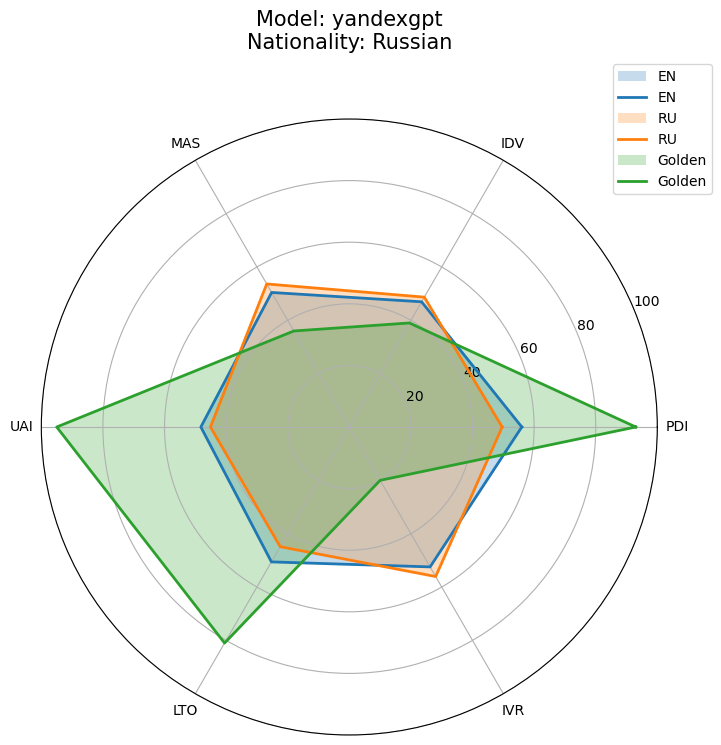

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for model in models:
    for nationality in nationalities:
        df = df_indices[df_indices['model'] == model]
        df = df[df['nationality'] == nationality]

        labels = df.columns[3:]  # The metrics
        num_vars = len(labels)

        # Compute angle for each axis
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The radar chart is a circular graph, so we need to "close the loop" by making a full circle
        angles += angles[:1]

        # Create a radar chart for each group by 'local'
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

        for local in locals:
            subset = df[df['local'] == local]
            mean_values = subset[labels].mean().tolist()
            mean_values += mean_values[:1]
            ax.fill(angles, mean_values, alpha=0.25, label=f'{local}')
            ax.plot(angles, mean_values, linewidth=2, label=f'{local}')

        df_golden_slice = df_golden[df_golden['ctr'] == 'USA']
        if nationality == 'Russian':
            df_golden_slice = df_golden[df_golden['ctr'] == 'RUS']

        mean_values = df_golden_slice[labels].mean().tolist()
        mean_values += mean_values[:1]
        ax.fill(angles, mean_values, alpha=0.25, label=f'Golden')
        ax.plot(angles, mean_values, linewidth=2, label=f'Golden')

        ax.set_rmin(0) 
        ax.set_rmax(100)
        
        #ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        
        ax.set_title(f'Model: {model}\nNationality: {nationality}', size=15, y=1.1)
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
        
        plt.savefig(f'pics/model nationality/Model {model} Nationality {nationality}.png', bbox_inches='tight')

        plt.show()

Locale/nationality.

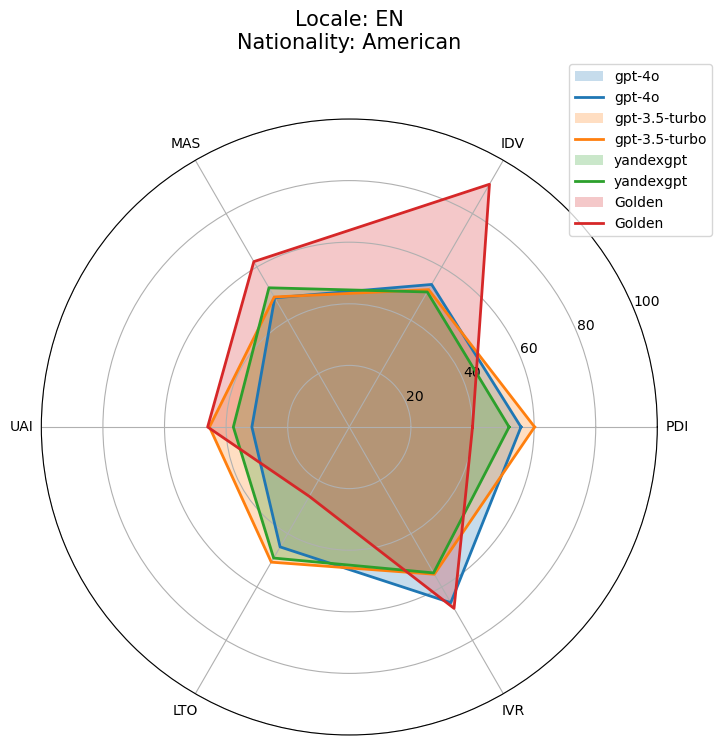

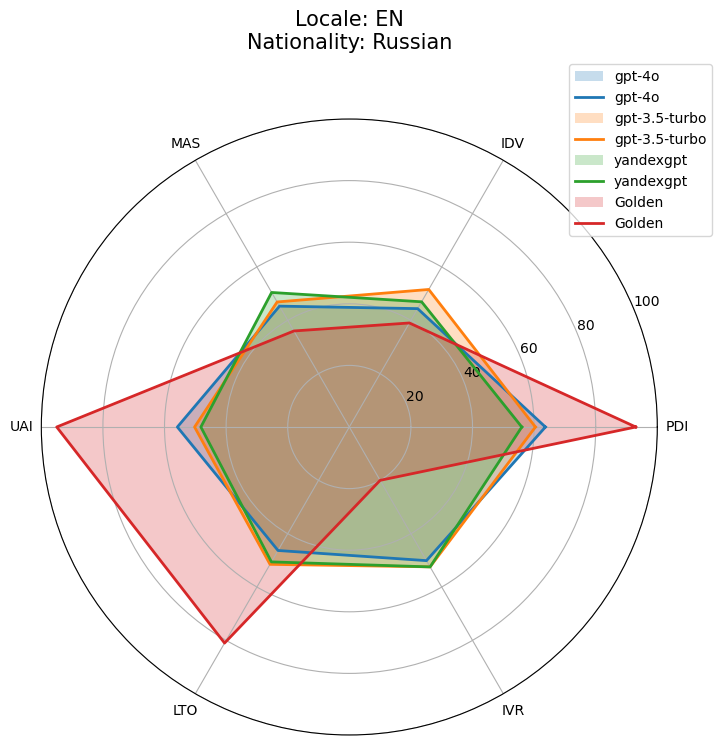

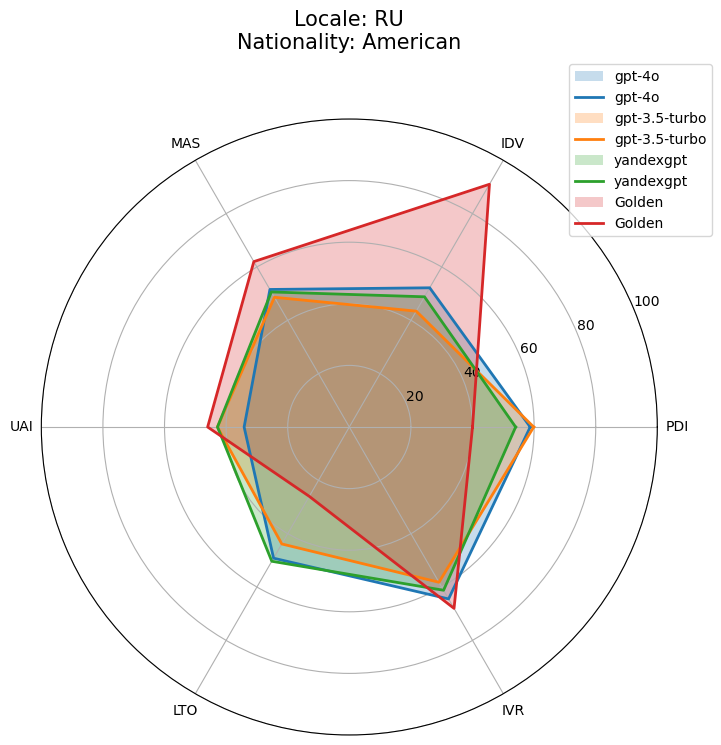

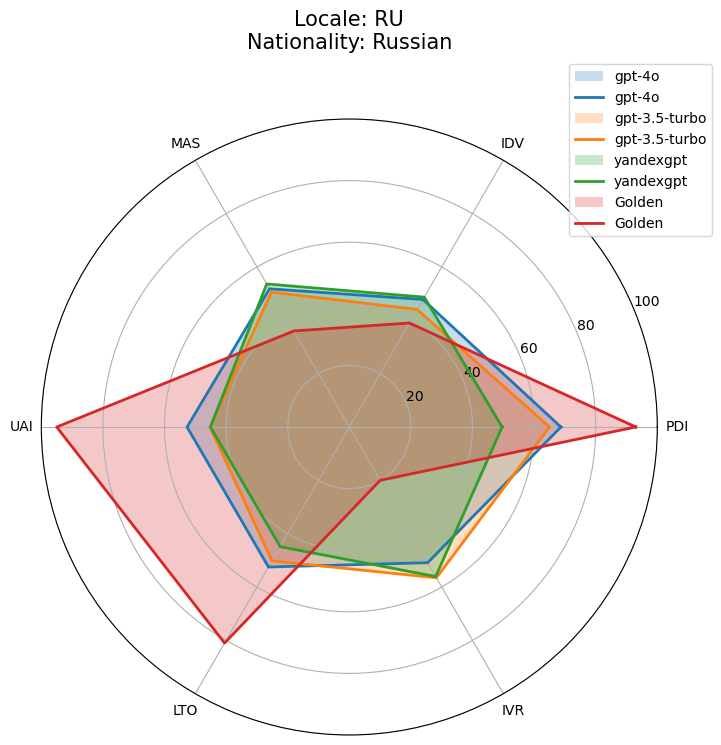

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for local in locals:
    for nationality in nationalities:
        df = df_indices[df_indices['local'] == local]
        df = df[df['nationality'] == nationality]

        labels = df.columns[3:] 
        num_vars = len(labels)
        
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        
        angles += angles[:1]
        
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

        for model in models:
            subset = df[df['model'] == model]
            mean_values = subset[labels].mean().tolist()
            mean_values += mean_values[:1]
            ax.fill(angles, mean_values, alpha=0.25, label=f'{model}')
            ax.plot(angles, mean_values, linewidth=2, label=f'{model}')

        df_golden_slice = df_golden[df_golden['ctr'] == 'USA']
        if nationality == 'Russian':
            df_golden_slice = df_golden[df_golden['ctr'] == 'RUS']

        mean_values = df_golden_slice[labels].mean().tolist()
        mean_values += mean_values[:1]
        ax.fill(angles, mean_values, alpha=0.25, label=f'Golden')
        ax.plot(angles, mean_values, linewidth=2, label=f'Golden')
        
        #ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        
        ax.set_rmin(0) 
        ax.set_rmax(100)
        
        ax.set_title(f'Locale: {local}\nNationality: {nationality}', size=15, y=1.1)
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
        
        plt.savefig(f'pics/local nationality/Locale {local} Nationality {nationality}.png', bbox_inches='tight')

        plt.show()

Model/locale.

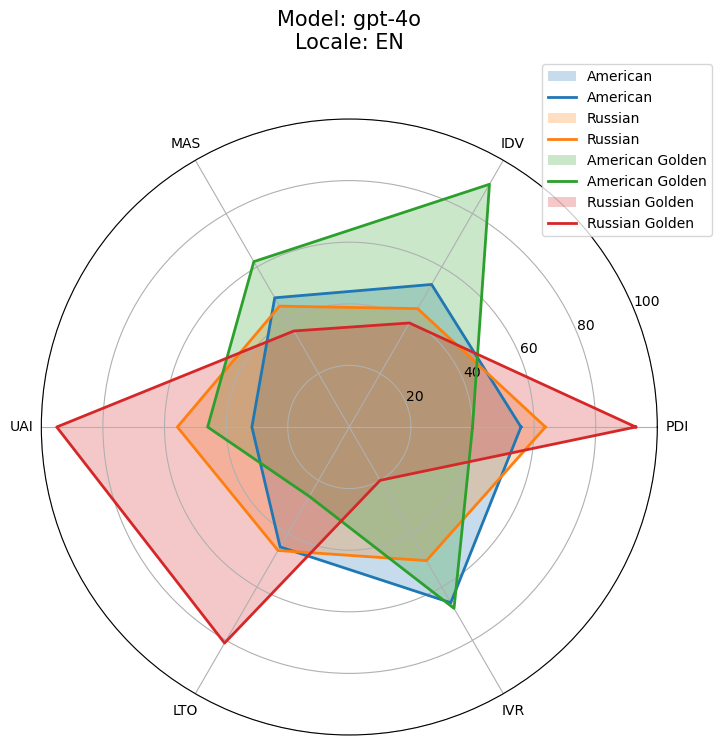

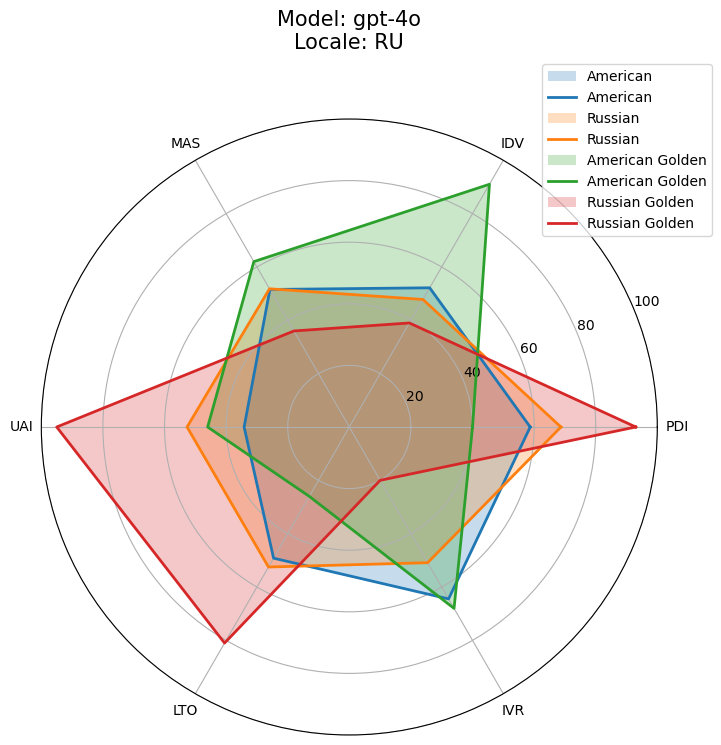

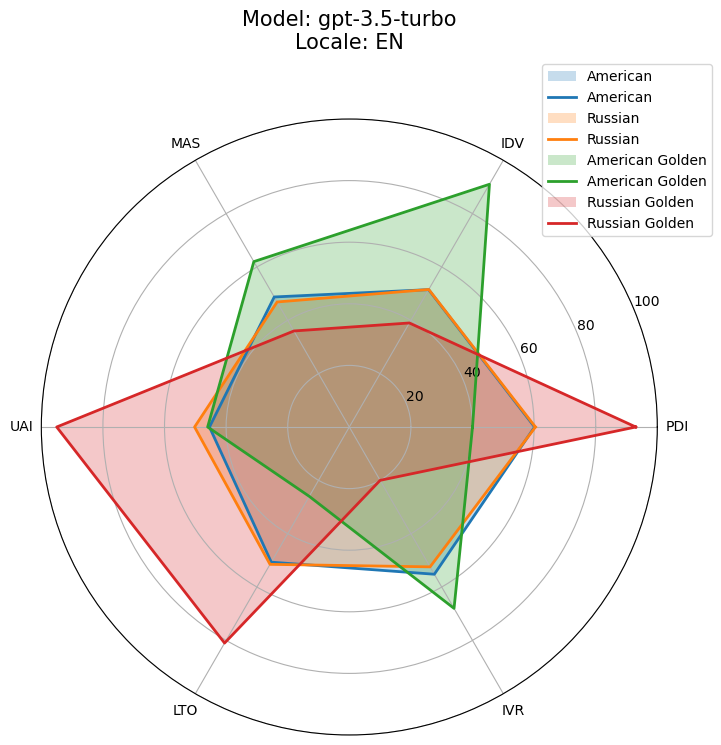

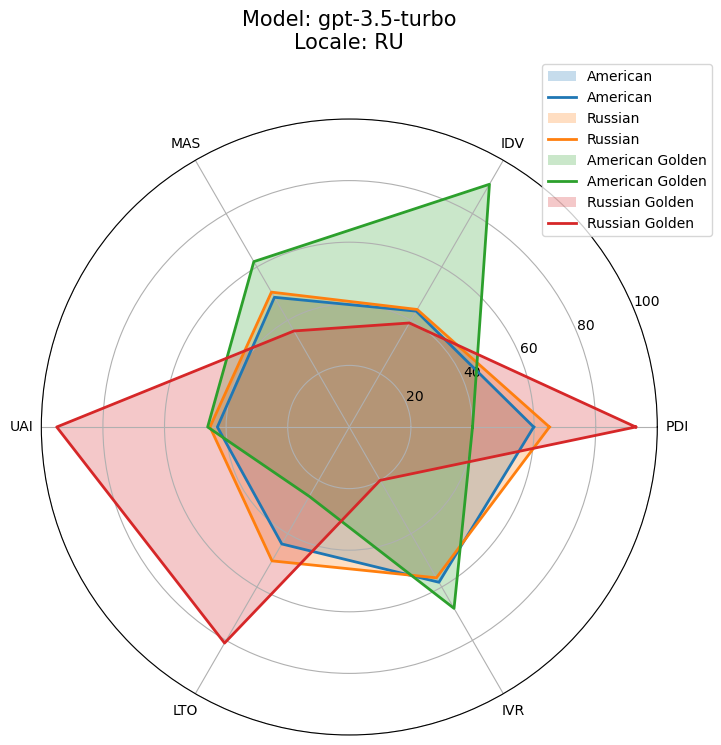

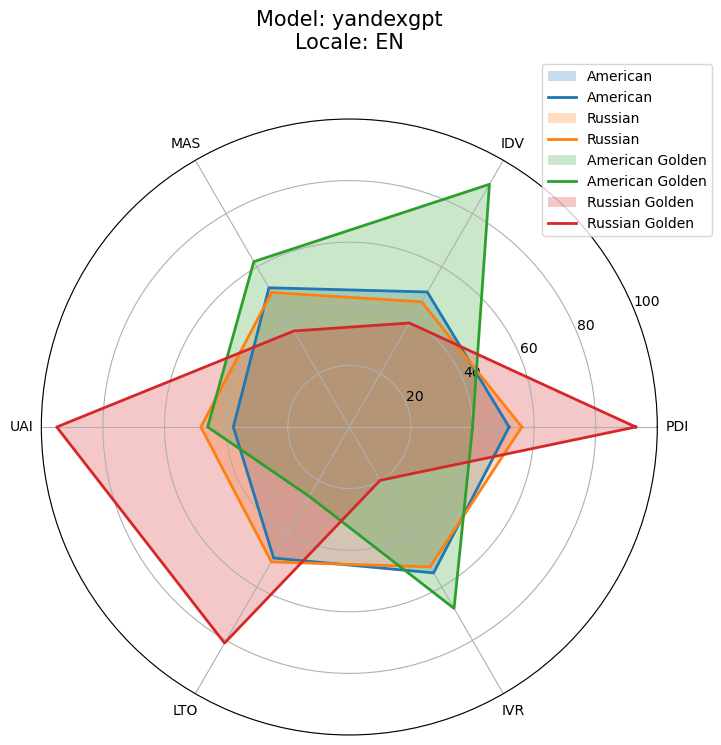

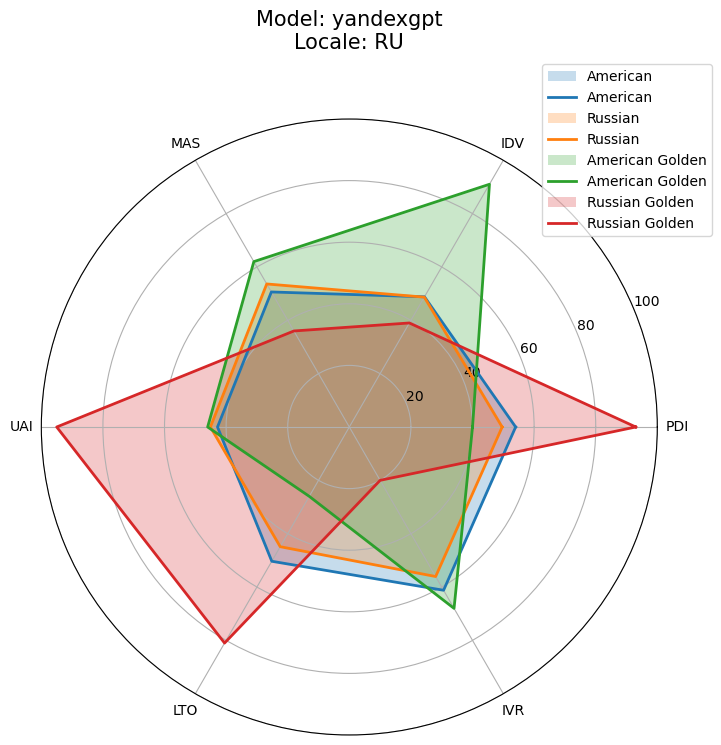

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for model in models:
    for local in locals:
        df = df_indices[df_indices['model'] == model]
        df = df[df['local'] == local]

        labels = df.columns[3:]
        num_vars = len(labels)
        
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        angles += angles[:1]
        
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

        for nationality in nationalities:
            subset = df[df['nationality'] == nationality]
            mean_values = subset[labels].mean().tolist()
            mean_values += mean_values[:1]
            ax.fill(angles, mean_values, alpha=0.25, label=f'{nationality}')
            ax.plot(angles, mean_values, linewidth=2, label=f'{nationality}')

        df_golden_slice = df_golden[df_golden['ctr'] == 'USA']

        mean_values = df_golden_slice[labels].mean().tolist()
        mean_values += mean_values[:1]
        ax.fill(angles, mean_values, alpha=0.25, label=f'American Golden')
        ax.plot(angles, mean_values, linewidth=2, label=f'American Golden')


        df_golden_slice = df_golden[df_golden['ctr'] == 'RUS']

        mean_values = df_golden_slice[labels].mean().tolist()
        mean_values += mean_values[:1]
        ax.fill(angles, mean_values, alpha=0.25, label=f'Russian Golden')
        ax.plot(angles, mean_values, linewidth=2, label=f'Russian Golden')

        ax.set_rmin(0) 
        ax.set_rmax(100)
        
        #ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        
        ax.set_title(f'Model: {model}\nLocale: {local}', size=15, y=1.1)
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
        
        plt.savefig(f'pics/model local/Model {model} Locale {local}.png', bbox_inches='tight')

        plt.show()